In [1]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn
%matplotlib inline

In [2]:
n = 500
m = 75
limit = 5.0
x = np.random.uniform(-limit, limit, size=n)
eps = np.random.normal(loc=0, scale=0.2, size=n)
y = 0.5 * x + 1. + eps

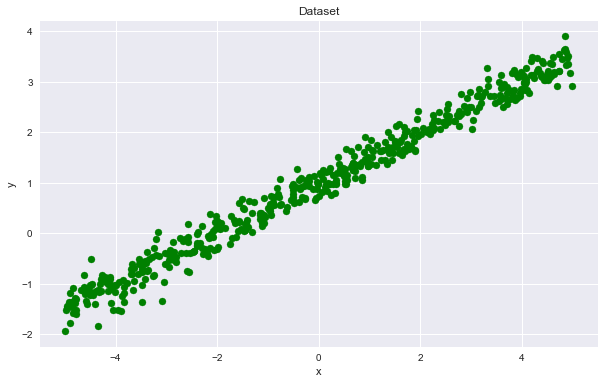

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

In [4]:
def getValue(kb):
    k, b = kb
    return lambda(t):k*t + b
def MSE(kb):
    g = getValue(kb)
    return ((g(x) - y)**2).mean(0)
def MAE(kb):
    g = getValue(kb)
    return (np.abs(g(x) - y)).mean(0)

In [5]:
answerMSE = minimize(MSE, (0, 1)).x
answerMAE = minimize(MAE, (0, 1), method='Nelder-Mead').x

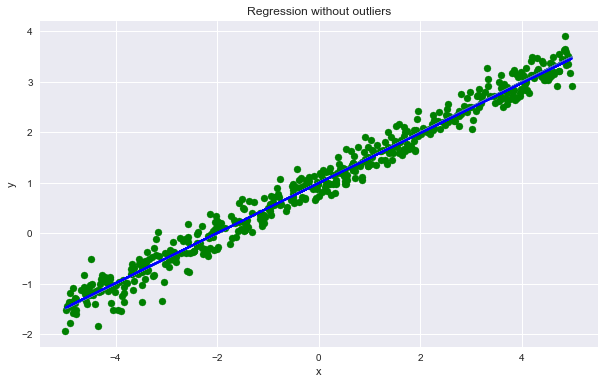

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, c='g')
plt.plot(x, getValue(answerMSE)(x), label = 'MSE', )
plt.plot(x, getValue(answerMAE)(x), c='b', label = 'MAE')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression without outliers')
plt.show()

In [7]:
#добавим выбросы
x = np.concatenate([x, np.random.uniform(-limit, limit, size=m)])
y = np.concatenate([y, -1. + np.random.normal(loc=0., scale=0.2, size=m)])                   

In [8]:
answerMSE = minimize(MSE, (0, 1)).x
answerMAE = minimize(MAE, (0, 1), method='Nelder-Mead').x

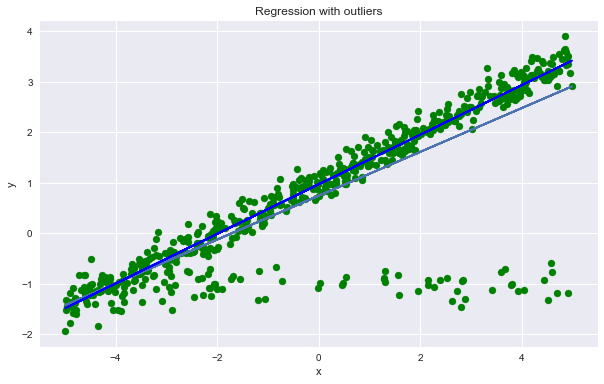

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, c='g')
plt.plot(x, getValue(answerMSE)(x), label = 'MSE', )
plt.plot(x, getValue(answerMAE)(x), c='b', label = 'MAE')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression with outliers')
plt.show()

Из полученных значений и графика выше видно, что минимизация MAE гораздо более устойчива к выбросам.